# NLTK PROCESS

## Dependances

In [123]:
import re
import os 
import sys
from urllib.request import urlopen
import requests
import pprint


In [127]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.grammar import DependencyGrammar
from nltk.parse import CoreNLPParser



In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [99]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [100]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [101]:
with open("../data/t1.txt") as f:   
    text = f.read()
text

'Jimmie Dowd is creating a rocket to go to Mars. He will launch the rocket in 2024. The spaceship will have a crew of 50 scientist and engineers who upon reaching the surface of Mars will conduct unprecedented scientific research. \n'

### from url

In [102]:
# url = "https://www.hq.nasa.gov/alsj/LM03_Apollo_Spacecraft_AS1-6.pdf"
# # html = urlopen(url).read()

# html= requests.get(url)


# text = BeautifulSoup(html.text, 'html.parser').get_text()
# text[:200]

## Text Pre-processing

### Sentence tokenizing:

In [103]:
sentences=sent_tokenize(text)
console.print(f'Number of sentences:{len(sentences)}')

console.print(sentences,style="bold blue on white")

Number of sentences:3

[
    'Jimmie Dowd is creating a rocket to go to Mars.',
    'He will launch the rocket in 2024.',
    'The spaceship will have a crew of 50 scientist and engineers who upon reaching the 
surface of Mars will conduct unprecedented scientific research.'
]

### Word tokenizing

In [104]:
words=word_tokenize(text)
console.print(f'Number of words: {len(words)}')

print(words)

Number of words: 43

['Jimmie', 'Dowd', 'is', 'creating', 'a', 'rocket', 'to', 'go', 'to', 'Mars', '.', 'He', 'will', 'launch', 'the', 'rocket', 'in', '2024', '.', 'The', 'spaceship', 'will', 'have', 'a', 'crew', 'of', '50', 'scientist', 'and', 'engineers', 'who', 'upon', 'reaching', 'the', 'surface', 'of', 'Mars', 'will', 'conduct', 'unprecedented', 'scientific', 'research', '.']


### Find the frequency distribution

In [105]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[('.', 3),
 ('will', 3),
 ('a', 2),
 ('rocket', 2),
 ('to', 2),
 ('Mars', 2),
 ('the', 2),
 ('of', 2),
 ('Jimmie', 1),
 ('Dowd', 1)]

### Plot the frequency graph

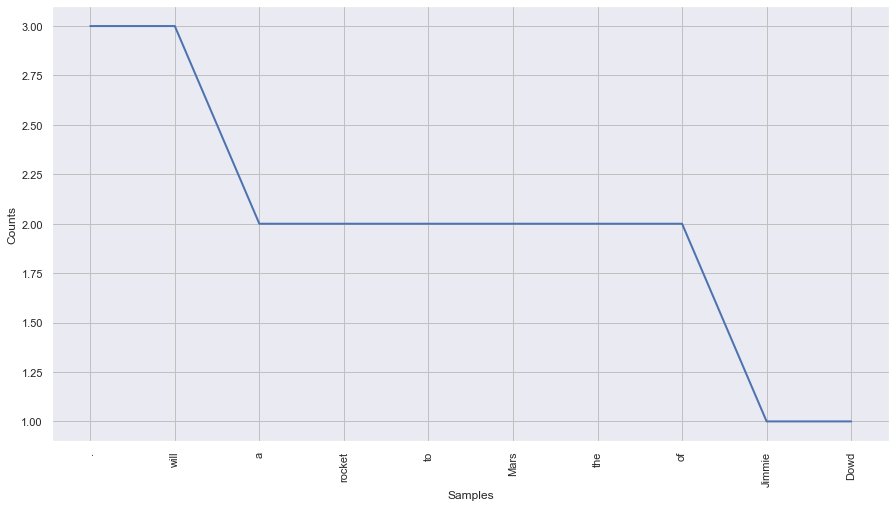

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [106]:
import matplotlib.pyplot as plt

fdist.plot(10)

### Remove punctuation marks

In [107]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['Jimmie', 'Dowd', 'is', 'creating', 'a', 'rocket', 'to', 'go', 'to', 'Mars', 'He', 'will', 'launch', 'the', 'rocket', 'in', 'The', 'spaceship', 'will', 'have', 'a', 'crew', 'of', 'scientist', 'and', 'engineers', 'who', 'upon', 'reaching', 'the', 'surface', 'of', 'Mars', 'will', 'conduct', 'unprecedented', 'scientific', 'research']
38


### Plotting graph without punctuation marks

In [108]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('will', 3),
 ('a', 2),
 ('rocket', 2),
 ('to', 2),
 ('Mars', 2),
 ('the', 2),
 ('of', 2),
 ('Jimmie', 1),
 ('Dowd', 1),
 ('is', 1)]

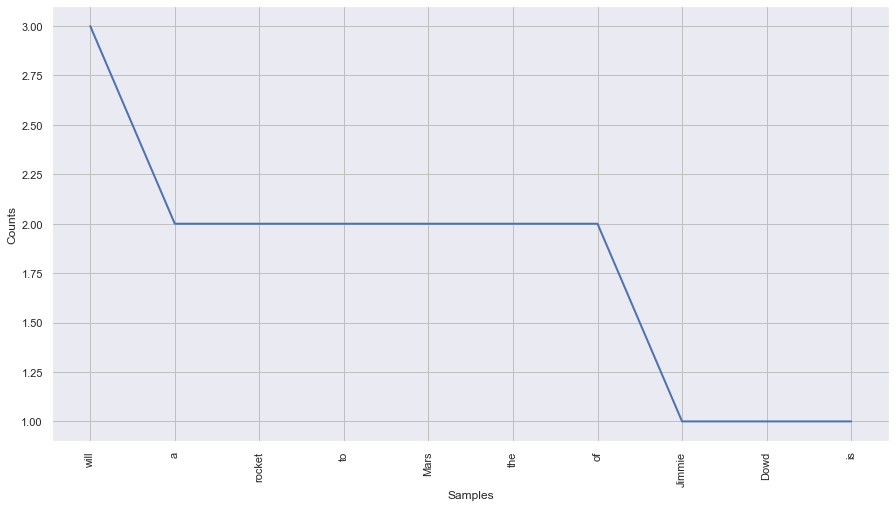

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [109]:
fdist.plot(10)

### List of stopwords

In [110]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Removing stopwords

In [111]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['Jimmie', 'Dowd', 'creating', 'rocket', 'go', 'Mars', 'He', 'launch', 'rocket', 'The', 'spaceship', 'crew', 'scientist', 'engineers', 'upon', 'reaching', 'surface', 'Mars', 'conduct', 'unprecedented', 'scientific', 'research']
22


### Final frequency distribution

In [112]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('rocket', 2),
 ('Mars', 2),
 ('Jimmie', 1),
 ('Dowd', 1),
 ('creating', 1),
 ('go', 1),
 ('He', 1),
 ('launch', 1),
 ('The', 1),
 ('spaceship', 1)]

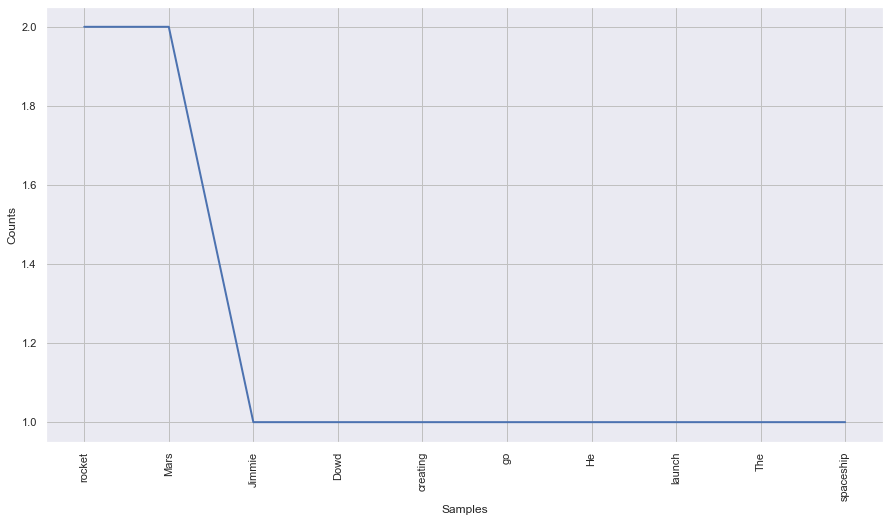

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [113]:
fdist.plot(10)

## Word Cloud

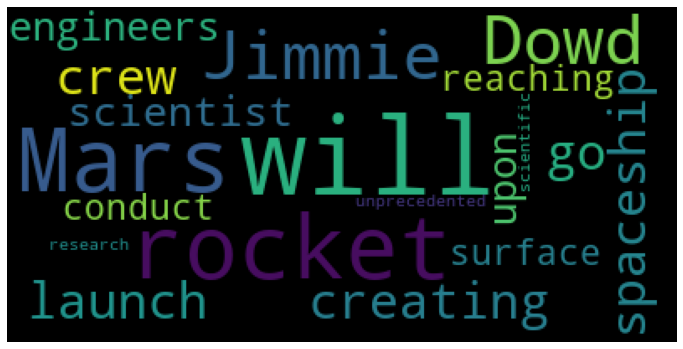

In [114]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [115]:
clean_words_joined=' '.join(clean_words)

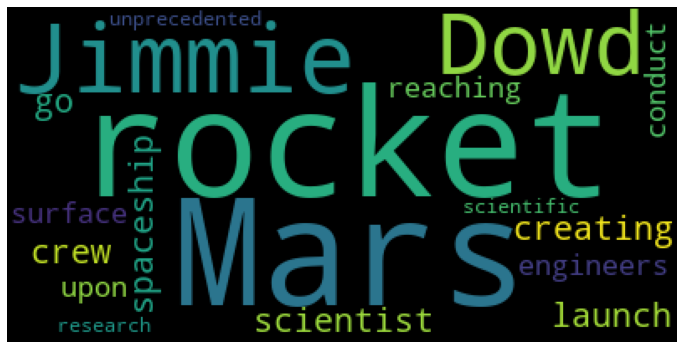

In [116]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [117]:
wordcloud.words_

{'rocket': 1.0,
 'Mars': 1.0,
 'Jimmie': 0.5,
 'Dowd': 0.5,
 'creating': 0.5,
 'go': 0.5,
 'launch': 0.5,
 'spaceship': 0.5,
 'crew': 0.5,
 'scientist': 0.5,
 'engineers': 0.5,
 'upon': 0.5,
 'reaching': 0.5,
 'surface': 0.5,
 'conduct': 0.5,
 'unprecedented': 0.5,
 'scientific': 0.5,
 'research': 0.5}

## Stemming

In [118]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

# word_list=['Programming','Programmers','Programmable','orbiter','electrical','studies','leaves','plays','am','is','were']
word_list=words

stemmed_words=[porter.stem(w) for w in word_list]

print(stemmed_words)

['jimmi', 'dowd', 'is', 'creat', 'a', 'rocket', 'to', 'go', 'to', 'mar', '.', 'He', 'will', 'launch', 'the', 'rocket', 'in', '2024', '.', 'the', 'spaceship', 'will', 'have', 'a', 'crew', 'of', '50', 'scientist', 'and', 'engin', 'who', 'upon', 'reach', 'the', 'surfac', 'of', 'mar', 'will', 'conduct', 'unpreced', 'scientif', 'research', '.']


## Lemmatization

In [119]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

pos_list=['v','n','a','r']
print(f'word_list--->{word_list}')
for i in pos_list: 
    lemmatized_words=[lemmatizer.lemmatize(w,pos=i) for w in word_list]

    print(f' POS:{i}\n{lemmatized_words}')

word_list--->['Jimmie', 'Dowd', 'is', 'creating', 'a', 'rocket', 'to', 'go', 'to', 'Mars', '.', 'He', 'will', 'launch', 'the', 'rocket', 'in', '2024', '.', 'The', 'spaceship', 'will', 'have', 'a', 'crew', 'of', '50', 'scientist', 'and', 'engineers', 'who', 'upon', 'reaching', 'the', 'surface', 'of', 'Mars', 'will', 'conduct', 'unprecedented', 'scientific', 'research', '.']
 POS:v
['Jimmie', 'Dowd', 'be', 'create', 'a', 'rocket', 'to', 'go', 'to', 'Mars', '.', 'He', 'will', 'launch', 'the', 'rocket', 'in', '2024', '.', 'The', 'spaceship', 'will', 'have', 'a', 'crew', 'of', '50', 'scientist', 'and', 'engineer', 'who', 'upon', 'reach', 'the', 'surface', 'of', 'Mars', 'will', 'conduct', 'unprecedented', 'scientific', 'research', '.']
 POS:n
['Jimmie', 'Dowd', 'is', 'creating', 'a', 'rocket', 'to', 'go', 'to', 'Mars', '.', 'He', 'will', 'launch', 'the', 'rocket', 'in', '2024', '.', 'The', 'spaceship', 'will', 'have', 'a', 'crew', 'of', '50', 'scientist', 'and', 'engineer', 'who', 'upon', 'r

## Part of Speech Tagging (PoS tagging)

In [120]:
tagged_words=nltk.pos_tag(word_list)
print(tagged_words)

[('Jimmie', 'NNP'), ('Dowd', 'NNP'), ('is', 'VBZ'), ('creating', 'VBG'), ('a', 'DT'), ('rocket', 'NN'), ('to', 'TO'), ('go', 'VB'), ('to', 'TO'), ('Mars', 'NNP'), ('.', '.'), ('He', 'PRP'), ('will', 'MD'), ('launch', 'VB'), ('the', 'DT'), ('rocket', 'NN'), ('in', 'IN'), ('2024', 'CD'), ('.', '.'), ('The', 'DT'), ('spaceship', 'NN'), ('will', 'MD'), ('have', 'VB'), ('a', 'DT'), ('crew', 'NN'), ('of', 'IN'), ('50', 'CD'), ('scientist', 'NN'), ('and', 'CC'), ('engineers', 'NNS'), ('who', 'WP'), ('upon', 'IN'), ('reaching', 'VBG'), ('the', 'DT'), ('surface', 'NN'), ('of', 'IN'), ('Mars', 'NNP'), ('will', 'MD'), ('conduct', 'VB'), ('unprecedented', 'JJ'), ('scientific', 'JJ'), ('research', 'NN'), ('.', '.')]


In [74]:
# sentence='The three-person EO-3 crew docked with Salyut 7 on 9 February, 1984, and entered the darkened station carrying flashlights.'
# sentence=text

# tokenized_words=word_tokenize(sentence)

# tagged_words=nltk.pos_tag(tokenized_words)

# tagged_words

## Chunking

In [122]:
grammar="NP : {<DT>?<JJ>*<NN>} "

parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
output.draw()

(S
  Jimmie/NNP
  Dowd/NNP
  is/VBZ
  creating/VBG
  (NP a/DT rocket/NN)
  to/TO
  go/VB
  to/TO
  Mars/NNP
  ./.
  He/PRP
  will/MD
  launch/VB
  (NP the/DT rocket/NN)
  in/IN
  2024/CD
  ./.
  (NP The/DT spaceship/NN)
  will/MD
  have/VB
  (NP a/DT crew/NN)
  of/IN
  50/CD
  (NP scientist/NN)
  and/CC
  engineers/NNS
  who/WP
  upon/IN
  reaching/VBG
  (NP the/DT surface/NN)
  of/IN
  Mars/NNP
  will/MD
  conduct/VB
  (NP unprecedented/JJ scientific/JJ research/NN)
  ./.)


## Chinking

In [76]:
grammar=r"""NP : {<.*>+}
}<JJ>+{"""
parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  (NP
    Jimmie/NNP
    Dowd/NNP
    is/VBZ
    creating/VBG
    a/DT
    rocket/NN
    to/TO
    go/VB
    to/TO
    Mars/NNP
    ./.
    He/PRP
    will/MD
    launch/VB
    the/DT
    rocket/NN
    in/IN
    2024/CD
    ./.
    The/DT
    spaceship/NN
    will/MD
    have/VB
    a/DT
    crew/NN
    of/IN
    50/CD
    scientist/NN
    and/CC
    engineers/NNS
    who/WP
    upon/IN
    reaching/VBG
    the/DT
    surface/NN
    of/IN
    Mars/NNP
    will/MD
    conduct/VB)
  unprecedented/JJ
  scientific/JJ
  (NP research/NN ./.))


## Named Entity Recognition (NER)

In [77]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)
N_E_R=nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

(S
  (PERSON Jimmie/NNP)
  (ORGANIZATION Dowd/NNP)
  is/VBZ
  creating/VBG
  a/DT
  rocket/NN
  to/TO
  go/VB
  to/TO
  (PERSON Mars/NNP)
  ./.
  He/PRP
  will/MD
  launch/VB
  the/DT
  rocket/NN
  in/IN
  2024/CD
  ./.
  The/DT
  spaceship/NN
  will/MD
  have/VB
  a/DT
  crew/NN
  of/IN
  50/CD
  scientist/NN
  and/CC
  engineers/NNS
  who/WP
  upon/IN
  reaching/VBG
  the/DT
  surface/NN
  of/IN
  (PERSON Mars/NNP)
  will/MD
  conduct/VB
  unprecedented/JJ
  scientific/JJ
  research/NN
  ./.)


In [78]:
# N_E_R.draw()


## WordNet

In [79]:
from nltk.corpus import wordnet



In [80]:
for words in wordnet.synsets('car'):
    print(f'{words.name()}\n{words.definition()}\n{words.examples()}\n')

    for lemma in words.lemmas():
        print(lemma)
    print('\n')

car.n.01
a motor vehicle with four wheels; usually propelled by an internal combustion engine
['he needs a car to get to work']

Lemma('car.n.01.car')
Lemma('car.n.01.auto')
Lemma('car.n.01.automobile')
Lemma('car.n.01.machine')
Lemma('car.n.01.motorcar')


car.n.02
a wheeled vehicle adapted to the rails of railroad
['three cars had jumped the rails']

Lemma('car.n.02.car')
Lemma('car.n.02.railcar')
Lemma('car.n.02.railway_car')
Lemma('car.n.02.railroad_car')


car.n.03
the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
[]

Lemma('car.n.03.car')
Lemma('car.n.03.gondola')


car.n.04
where passengers ride up and down
['the car was on the top floor']

Lemma('car.n.04.car')
Lemma('car.n.04.elevator_car')


cable_car.n.01
a conveyance for passengers or freight on a cable railway
['they took a cable car to the top of the mountain']

Lemma('cable_car.n.01.cable_car')
Lemma('cable_car.n.01.car')




###  Hypernyms: Hypernyms gives us a more abstract term for a word.

In [81]:
word=wordnet.synsets('rocket')[0]

print(word.hypernyms())

[Synset('vehicle.n.01')]


### Hyponyms: Hyponyms gives us a more specific term for a word.

In [82]:
word=wordnet.synsets('rocket')[0]

print(word.hyponyms())

[Synset('missile.n.01'), Synset('multistage_rocket.n.01'), Synset('test_rocket.n.01')]


In [83]:
[word.hyponyms()[i].name() for i in range(len(word.hyponyms()))]

['missile.n.01', 'multistage_rocket.n.01', 'test_rocket.n.01']

### Get a name only

In [84]:
word=wordnet.synsets('rocket')[0]
print(word.lemmas()[0].name())

rocket


### Synonyms.

In [85]:
synonyms=[]

for words in wordnet.synsets('rocket'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
synonyms

['rocket',
 'projectile',
 'rocket',
 'rocket_engine',
 'rocket',
 'roquette',
 'garden_rocket',
 'rocket_salad',
 'arugula',
 'Eruca_sativa',
 'Eruca_vesicaria_sativa',
 'rocket',
 'skyrocket',
 'skyrocket',
 'rocket',
 'rocket',
 'skyrocket',
 'rocket']

### Antonyms

In [86]:
antonyms=[]

for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
antonyms

['unnatural', 'artificial', 'supernatural', 'sharp']

### Synonyms and antonyms

In [87]:
synonyms=[]
antonyms=[]
for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())


print(f'synonyms:\n{synonyms}\n')
print(f'antonyms:\n{antonyms}\n')

synonyms:
['natural', 'natural', 'cancel', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'instinctive', 'natural', 'raw', 'rude', 'natural', 'natural', 'born', 'innate', 'lifelike', 'natural']

antonyms:
['unnatural', 'artificial', 'supernatural', 'sharp']



###  Finding the similarity between words

In [88]:
word1=wordnet.synsets('ship','n')[0]

word2=wordnet.synsets('dog','n')[0]

word1.wup_similarity(word2)


0.4

# Bag-of-Words

In [89]:
# from collections import Counter

# text=text.lower()
# Counter(word_tokenize(text))

# Counter(text).most_common(2)
# Counter(word_tokenize(text)).most_common(2)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

# sentences=['Jim is a person', 'Jim likes to fly.', 'Jim wants to walk his dog.']

cv=CountVectorizer(stop_words='english',ngram_range=(1,1))

B_O_W= cv.fit_transform(sentences).toarray()
sum_words = B_O_W.sum(axis=0)
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)


print(cv.vocabulary_)
print(cv.get_feature_names())
print(B_O_W)
print(f'BOW shape: {B_O_W.shape}')
print(sum_words)
print(words_freq)

{'jimmie': 7, 'dowd': 5, 'creating': 3, 'rocket': 12, 'mars': 9, 'launch': 8, '2024': 0, 'spaceship': 15, 'crew': 4, '50': 1, 'scientist': 14, 'engineers': 6, 'reaching': 10, 'surface': 16, 'conduct': 2, 'unprecedented': 17, 'scientific': 13, 'research': 11}
['2024', '50', 'conduct', 'creating', 'crew', 'dowd', 'engineers', 'jimmie', 'launch', 'mars', 'reaching', 'research', 'rocket', 'scientific', 'scientist', 'spaceship', 'surface', 'unprecedented']
[[0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1]]
BOW shape: (3, 18)
[1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1]
[('rocket', 2), ('mars', 2), ('jimmie', 1), ('dowd', 1), ('creating', 1), ('launch', 1), ('2024', 1), ('spaceship', 1), ('crew', 1), ('50', 1), ('scientist', 1), ('engineers', 1), ('reaching', 1), ('surface', 1), ('conduct', 1), ('unprecedented', 1), ('scientific', 1), ('research', 1)]


c:\Users\dowdj\OneDrive\Documents\GitHub\NLP-Training\nltk\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [91]:
n=20
top_words = words_freq[0:n]
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

top_df.head()

,Word,Freq
0,rocket,2
1,mars,2
2,jimmie,1
3,dowd,1
4,creating,1


[Text(0, 0, 'rocket'),
 Text(1, 0, 'mars'),
 Text(2, 0, 'jimmie'),
 Text(3, 0, 'dowd'),
 Text(4, 0, 'creating'),
 Text(5, 0, 'launch'),
 Text(6, 0, '2024'),
 Text(7, 0, 'spaceship'),
 Text(8, 0, 'crew'),
 Text(9, 0, '50'),
 Text(10, 0, 'scientist'),
 Text(11, 0, 'engineers'),
 Text(12, 0, 'reaching'),
 Text(13, 0, 'surface'),
 Text(14, 0, 'conduct'),
 Text(15, 0, 'unprecedented'),
 Text(16, 0, 'scientific'),
 Text(17, 0, 'research')]

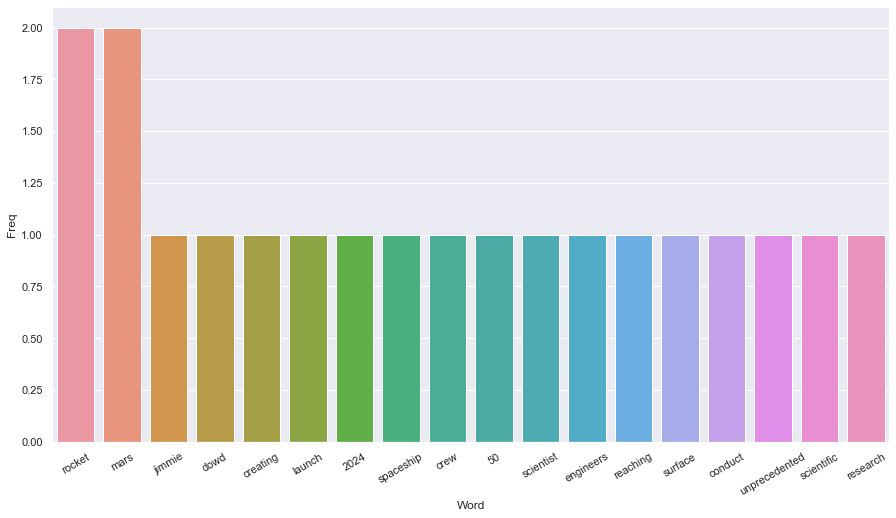

In [92]:
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [93]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)



tagged_words

[('Jimmie', 'NNP'),
 ('Dowd', 'NNP'),
 ('is', 'VBZ'),
 ('creating', 'VBG'),
 ('a', 'DT'),
 ('rocket', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Mars', 'NNP'),
 ('.', '.'),
 ('He', 'PRP'),
 ('will', 'MD'),
 ('launch', 'VB'),
 ('the', 'DT'),
 ('rocket', 'NN'),
 ('in', 'IN'),
 ('2024', 'CD'),
 ('.', '.'),
 ('The', 'DT'),
 ('spaceship', 'NN'),
 ('will', 'MD'),
 ('have', 'VB'),
 ('a', 'DT'),
 ('crew', 'NN'),
 ('of', 'IN'),
 ('50', 'CD'),
 ('scientist', 'NN'),
 ('and', 'CC'),
 ('engineers', 'NNS'),
 ('who', 'WP'),
 ('upon', 'IN'),
 ('reaching', 'VBG'),
 ('the', 'DT'),
 ('surface', 'NN'),
 ('of', 'IN'),
 ('Mars', 'NNP'),
 ('will', 'MD'),
 ('conduct', 'VB'),
 ('unprecedented', 'JJ'),
 ('scientific', 'JJ'),
 ('research', 'NN'),
 ('.', '.')]

In [135]:
parser = CoreNLPParser(url='http://localhost:8080')
list(parser.parse('What is the airspeed of an unladen swallow ?'.split()))

ConnectionError: HTTPConnectionPool(host='localhost', port=8080): Max retries exceeded with url: /?properties=%7B%22outputFormat%22%3A+%22json%22%2C+%22annotators%22%3A+%22tokenize%2Cpos%2Clemma%2Cssplit%2Cparse%22%2C+%22ssplit.eolonly%22%3A+%22true%22%7D (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000028B15B16D30>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

## TF-IDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm=None,stop_words='english')

X=vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(X)

{'jimmie': 7, 'dowd': 5, 'creating': 3, 'rocket': 12, 'mars': 9, 'launch': 8, '2024': 0, 'spaceship': 15, 'crew': 4, '50': 1, 'scientist': 14, 'engineers': 6, 'reaching': 10, 'surface': 16, 'conduct': 2, 'unprecedented': 17, 'scientific': 13, 'research': 11}
['2024', '50', 'conduct', 'creating', 'crew', 'dowd', 'engineers', 'jimmie', 'launch', 'mars', 'reaching', 'research', 'rocket', 'scientific', 'scientist', 'spaceship', 'surface', 'unprecedented']
[[0.         0.         0.         1.69314718 0.         1.69314718
  0.         1.69314718 0.         1.28768207 0.         0.
  1.28768207 0.         0.         0.         0.         0.        ]
 [1.69314718 0.         0.         0.         0.         0.
  0.         0.         1.69314718 0.         0.         0.
  1.28768207 0.         0.         0.         0.         0.        ]
 [0.         1.69314718 1.69314718 0.         1.69314718 0.
  1.69314718 0.         0.         1.28768207 1.69314718 1.69314718
  0.         1.69314718 1.6931

c:\Users\dowdj\OneDrive\Documents\GitHub\NLP-Training\nltk\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
X.shape

(3, 18)

In [96]:
# """Example of Python client calling Knowledge Graph Search API."""
# from __future__ import print_function
# import json
# import urllib

# api_key = open('.api_key').read()
# query = 'Taylor Swift'
# service_url = 'https://kgsearch.googleapis.com/v1/entities:search'
# params = {
#     'query': query,
#     'limit': 10,
#     'indent': True,
#     'key': api_key,
# }
# url = service_url + '?' + urllib.urlencode(params)
# response = json.loads(urllib.urlopen(url).read())
# for element in response['itemListElement']:
#   print(element['result']['name'] + ' (' + str(element['resultScore']) + ')')
